# Telco Customer Churn

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
customers = pd.read_csv('data.csv')

### Data at glance

In [81]:
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Removing redundant columns

In [82]:
customers = customers.drop(columns=['customerID'])
customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
customers.shape

(7043, 20)

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [85]:
customers.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Numerical analysis and visualization

We'll analyze Tenure column:



In [86]:
customers['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [87]:
customers['tenure'].mean()

32.37114865824223

In [88]:
customers['tenure'].median()

29.0

<AxesSubplot:>

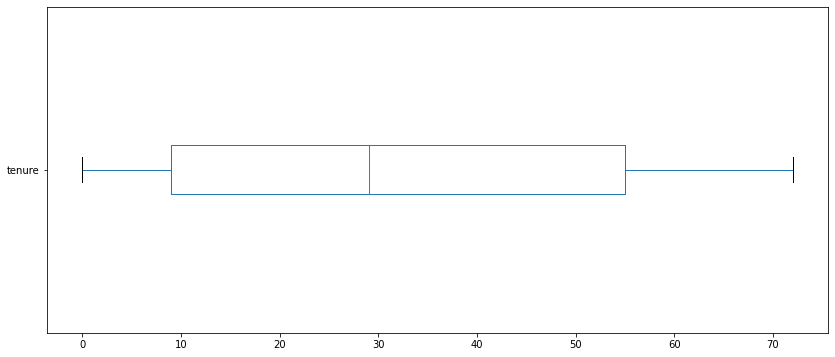

In [89]:
customers['tenure'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

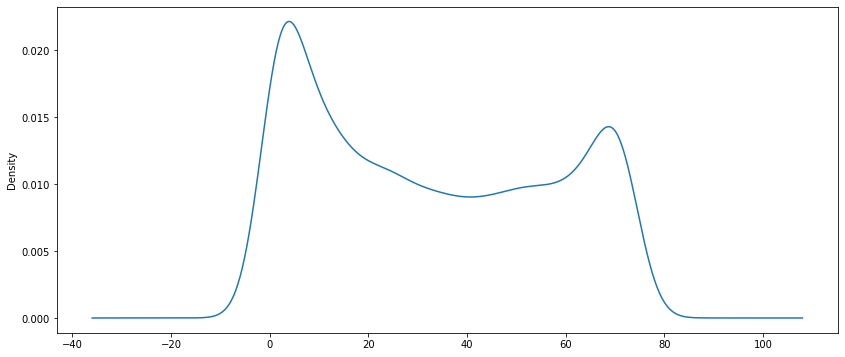

In [90]:
customers['tenure'].plot(kind='density', figsize=(14,6)) 

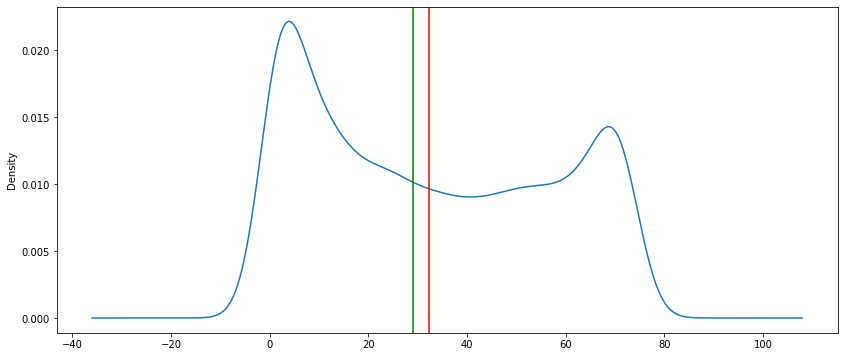

In [91]:
ax = customers['tenure'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(customers['tenure'].mean(), color='red')
ax.axvline(customers['tenure'].median(), color='green')

Text(0.5, 0, 'Tenure days')

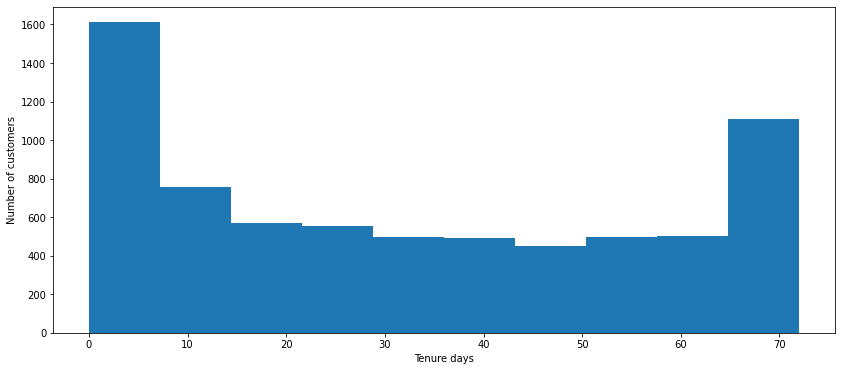

In [92]:
ax = customers['tenure'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of customers')
ax.set_xlabel('Tenure days')

## Categorical analysis and visualization

We'll analyze the Contract column:



In [93]:
customers.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [94]:
customers['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:ylabel='Contract'>

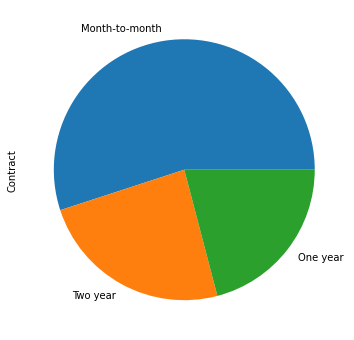

In [95]:
customers['Contract'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Cusomters')

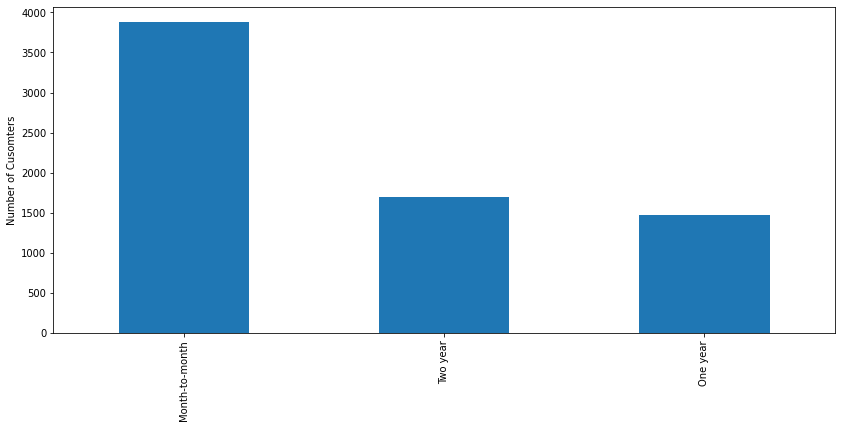

In [96]:
ax = customers['Contract'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Cusomters')

## Relationship between the columns

Can we find any significant relationship

Convert NAN's to numbers:


In [97]:
customers.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [98]:
customers = customers.apply(lambda col: pd.factorize(col)[0])	
customers.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2,1


In [99]:
corr = customers.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,-0.000013,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.008072,-0.012302,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.010834,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.049649,0.023880,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.101985,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.036054,-0.042628,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.048514,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.029390,0.006300,-0.164221
tenure,-0.000013,0.010834,-0.101985,0.048514,1.000000,-0.018799,0.063510,-0.012008,0.017083,-0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,-0.011129,0.075379,0.041647,0.108142,-0.144351
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,-0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.141829,-0.029806,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.063510,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024338,0.015373,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.289963,-0.038247,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.017083,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.220566,-0.026788,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.064613,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.284344,-0.054537,-0.074205


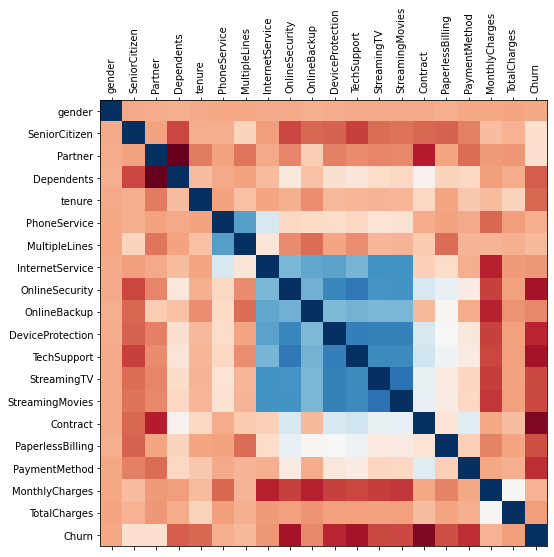

In [100]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

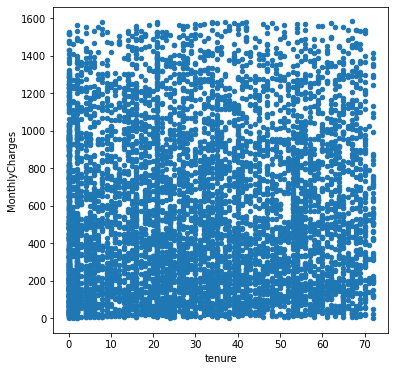

In [101]:
customers.plot(kind='scatter', x='tenure', y='MonthlyCharges', figsize=(6,6))

## Applying KNN 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

Splitting data

In [103]:
all_inputs = customers.loc[:,customers.columns!='Churn'].values
all_classes = customers['Churn'].values
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

Comparing diffenrt values of K:

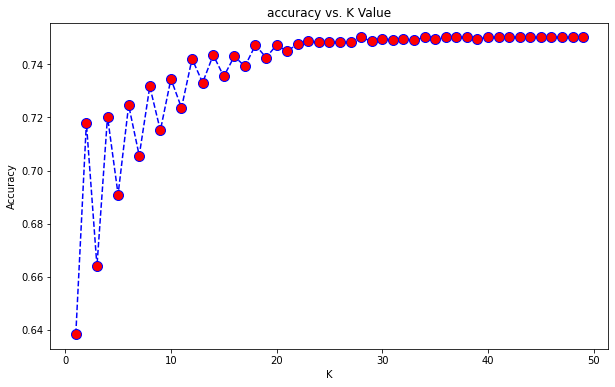

In [104]:
def getScore(k, train_inputs, train_classes, test_inputs, test_classes):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_inputs, train_classes)
    return knn.score(test_inputs, test_classes)

scores = []
for k in range(1, 50):
    score = getScore(k, train_inputs, train_classes, test_inputs, test_classes)
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), scores, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


Maximum accuracy:

In [105]:
knn_accuracy = max(scores)
knn_accuracy

0.7501183151916706

For k:

In [106]:
MAX_K = scores.index(max(scores)) + 1
MAX_K

28

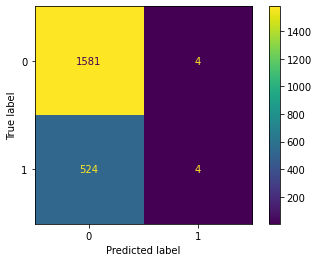

In [107]:
clf = KNeighborsClassifier(n_neighbors=MAX_K)
clf.fit(train_inputs, train_classes)
plot_confusion_matrix(clf, test_inputs, test_classes)
plt.show()

## Applying decision tree classification

In [108]:
from sklearn.tree import DecisionTreeClassifier

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7,                                                                                random_state=1)
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

Accuracy is:

In [109]:
dtc.score(test_inputs, test_classes)

0.7529578797917653

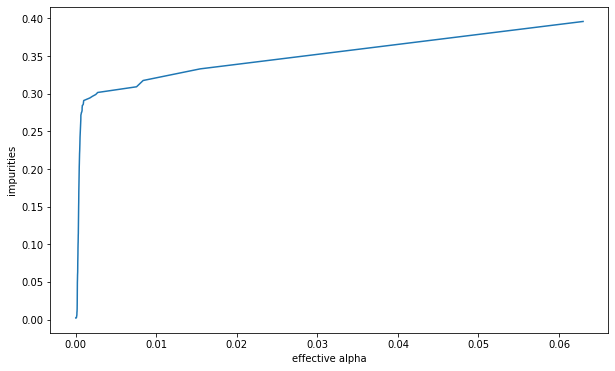

In [110]:
# pruning
path = dtc.cost_complexity_pruning_path(train_inputs, train_classes)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("impurities")
plt.show()

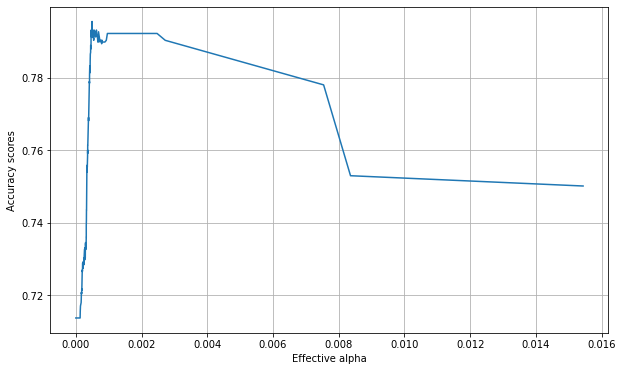

In [111]:
from sklearn.metrics import accuracy_score

clfs = []
for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtc.fit(train_inputs, train_classes)
    clfs.append(dtc)
acc_scores = [accuracy_score(test_classes, clf.predict(test_inputs)) for clf in clfs]
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("Effective alpha")
plt.ylabel("Accuracy scores")
plt.show()

Max score 

In [112]:
dtc_accuracy = max(acc_scores[:-1])
dtc_accuracy

0.795551348793185

Best alpha

In [113]:
best_alpha = ccp_alphas[acc_scores.index(dtc_accuracy)]
best_alpha

0.0004946597238686492

Confusion matrix

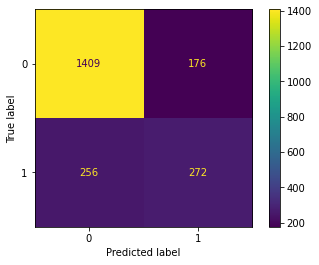

In [114]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(train_inputs, train_classes)
plot_confusion_matrix(clf, test_inputs, test_classes)
plt.show()

## Applyting Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7,                                                                                random_state=1)

gnb = GaussianNB()
gnb.fit(train_inputs, train_classes)
pred = gnb.fit(train_inputs, train_classes).predict(test_inputs)


Accuracy

In [116]:
nb_accuracy = accuracy_score(test_classes, gnb.predict(test_inputs))
nb_accuracy

0.7127307146237577

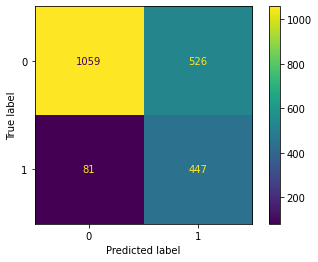

In [117]:
plot_confusion_matrix(gnb, test_inputs, test_classes)
plt.show()

## Comparing 3 accuraccies

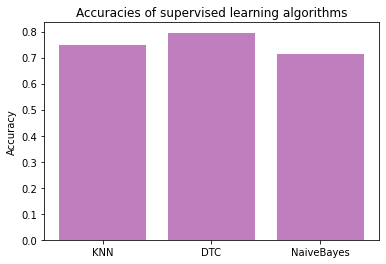

In [118]:
objects = ('KNN', 'DTC', 'NaiveBayes')
y_pos = np.arange(len(objects))
performance = [knn_accuracy, dtc_accuracy, nb_accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'purple')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracies of supervised learning algorithms')
plt.show()

# Conclusion

In [119]:
knn_accuracy

0.7501183151916706

In [120]:
dtc_accuracy

0.795551348793185

In [121]:
nb_accuracy

0.7127307146237577

Decision tree classiffier outperformed other algorithms.
False negative is more risky in the case. For the company is more beneficial to take excessive actions to keep the customer, than lose the customer.